# 导入包

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
import json
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
#数据可视化
import matplotlib.pyplot as plt
import plotly.offline as pyo #用不好，运行没有效果放到最后待后续解决
import plotly.graph_objs as pyg
import plotly.tools as pyt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [4]:
credits_file = 'C:/Users/Michael/Desktop/test/tmdb_5000_credits.csv'
movies_file = 'C:/Users/Michael/Desktop/test/tmdb_5000_movies.csv'
credits = pd.read_csv(credits_file, encoding='utf-8')
movies = pd.read_csv(movies_file, parse_dates=['release_date'])

# 查看信息

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
#删除title，homepage，id
null_drop = ['title', 'homepage', 'id']
movies.drop(null_drop, axis=1,inplace=True)
full = pd.concat([credits,movies] , axis = 1)
print (full.info())
print (''.center(45, "*"))
print (full.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
vote_average            4803 no

In [8]:
full.head()

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


# 填补缺失值

In [9]:
#删除无用信息
full.drop('status',axis=1,inplace=True)
full.drop('tagline',axis=1,inplace=True)
full.drop('overview',axis=1,inplace=True)

In [10]:
full[full.runtime.isnull()]

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
2656,370980,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",15000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",7.3,12
4140,459488,"To Be Frank, Sinatra at 100","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],0.0,0


In [11]:
#填充runtime缺失值,分别填写94.0和240.0
values1 = {'runtime': 94.0}
values2 = {'runtime': 240.0}
full.fillna(value=values1, limit = 1 , inplace = True)
full.fillna(value=values2, limit = 1 , inplace = True)
print (full.loc[2656])
print (''.center(73, '*'))
print (full.loc[4140])

movie_id                                                           370980
title                          Chiamatemi Francesco - Il Papa della gente
cast                    [{"cast_id": 5, "character": "Jorge Mario Berg...
crew                    [{"credit_id": "5660019ac3a36875f100252b", "de...
budget                                                           15000000
genres                                      [{"id": 18, "name": "Drama"}]
keywords                [{"id": 717, "name": "pope"}, {"id": 5565, "na...
original_language                                                      it
original_title                 Chiamatemi Francesco - Il Papa della gente
popularity                                                       0.738646
production_companies               [{"name": "Taodue Film", "id": 45724}]
production_countries              [{"iso_3166_1": "IT", "name": "Italy"}]
release_date                                          2015-12-03 00:00:00
revenue                               

# 提取特征值

In [12]:
json_cols = 'cast', 'crew','genres','keywords','production_companies','production_countries','spoken_languages'
for c in json_cols:
    full[c] = full[c].map(json.loads)

In [13]:
def value_update(s, d, idxes):
    for idx in idxes:
        d[idx] = s[idx]

def calculate_json_col(row, src_col, kept_cols):
    df = None
    if row[src_col]:
        df = pd.DataFrame.from_records(row[src_col])
    else:
        df = pd.DataFrame()
    if kept_cols:
        value_update(row, df, kept_cols)
    return df

def collect_json_col(src_df, src_col, kept_cols):
    return pd.concat(map(lambda x: calculate_json_col(src_df.loc[x],
                                               src_col, kept_cols),
                                               src_df.index),
                   axis=0, ignore_index=True)
kept_cols = ['title', 'movie_id']

In [14]:
cast_df = collect_json_col(full, 'cast', kept_cols)
cast_df.head()

,cast_id,character,credit_id,gender,id,movie_id,name,order,title
0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,19995,Sam Worthington,0.0,Avatar
1,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,19995,Zoe Saldana,1.0,Avatar
2,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,19995,Sigourney Weaver,2.0,Avatar
3,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,32747.0,19995,Stephen Lang,3.0,Avatar
4,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,17647.0,19995,Michelle Rodriguez,4.0,Avatar


In [15]:
crew_df = collect_json_col(full, 'crew', kept_cols)
crew_df.head(20)

,credit_id,department,gender,id,job,movie_id,name,title
0,52fe48009251416c750aca23,Editing,0.0,1721.0,Editor,19995,Stephen E. Rivkin,Avatar
1,539c47ecc3a36810e3001f87,Art,2.0,496.0,Production Design,19995,Rick Carter,Avatar
2,54491c89c3a3680fb4001cf7,Sound,0.0,900.0,Sound Designer,19995,Christopher Boyes,Avatar
3,54491cb70e0a267480001bd0,Sound,0.0,900.0,Supervising Sound Editor,19995,Christopher Boyes,Avatar
4,539c4a4cc3a36810c9002101,Production,1.0,1262.0,Casting,19995,Mali Finn,Avatar
5,5544ee3b925141499f0008fc,Sound,2.0,1729.0,Original Music Composer,19995,James Horner,Avatar
6,52fe48009251416c750ac9c3,Directing,2.0,2710.0,Director,19995,James Cameron,Avatar
7,52fe48009251416c750ac9d9,Writing,2.0,2710.0,Writer,19995,James Cameron,Avatar
8,52fe48009251416c750aca17,Editing,2.0,2710.0,Editor,19995,James Cameron,Avatar
9,52fe48009251416c750aca29,Production,2.0,2710.0,Producer,19995,James Cameron,Avatar


In [16]:
genres_df = collect_json_col(full, 'genres', kept_cols)
genres_df.head()


,id,movie_id,name,title
0,28.0,19995,Action,Avatar
1,12.0,19995,Adventure,Avatar
2,14.0,19995,Fantasy,Avatar
3,878.0,19995,Science Fiction,Avatar
4,12.0,285,Adventure,Pirates of the Caribbean: At World's End


In [17]:
keywords_df = collect_json_col(full, 'keywords', kept_cols)
keywords_df.head()

,id,movie_id,name,title
0,1463.0,19995,culture clash,Avatar
1,2964.0,19995,future,Avatar
2,3386.0,19995,space war,Avatar
3,3388.0,19995,space colony,Avatar
4,3679.0,19995,society,Avatar


In [18]:
production_companies_df = collect_json_col(full, 'production_companies', kept_cols)
production_companies_df.head()

,id,movie_id,name,title
0,289.0,19995,Ingenious Film Partners,Avatar
1,306.0,19995,Twentieth Century Fox Film Corporation,Avatar
2,444.0,19995,Dune Entertainment,Avatar
3,574.0,19995,Lightstorm Entertainment,Avatar
4,2.0,285,Walt Disney Pictures,Pirates of the Caribbean: At World's End


In [19]:
spoken_languages_df = collect_json_col(full, 'spoken_languages', kept_cols)
spoken_languages_df.head()

,iso_639_1,movie_id,name,title
0,en,19995,English,Avatar
1,es,19995,Español,Avatar
2,en,285,English,Pirates of the Caribbean: At World's End
3,fr,206647,Français,Spectre
4,en,206647,English,Spectre


In [20]:
production_countries_df = collect_json_col(full, 'production_countries', kept_cols)
production_countries_df.head()

,iso_3166_1,movie_id,name,title
0,US,19995,United States of America,Avatar
1,GB,19995,United Kingdom,Avatar
2,US,285,United States of America,Pirates of the Caribbean: At World's End
3,GB,206647,United Kingdom,Spectre
4,US,206647,United States of America,Spectre


In [21]:
json_cols = ['production_countries', 'spoken_languages', 'production_companies', 'keywords', 'genres', 'crew', 'cast']
full.drop(json_cols, axis=1, inplace=True)

In [22]:
full.head()

,movie_id,title,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,19995,Avatar,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500
2,206647,Spectre,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466
3,49026,The Dark Knight Rises,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106
4,49529,John Carter,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124


In [23]:
cast_df.character.value_counts().head(20)

Himself                      909
                             683
Dancer                       375
Additional Voices (voice)    323
Herself                      229
Reporter                     136
Doctor                       132
Nurse                        117
Waitress                     108
Bartender                     93
Extra: Bar / Comedy Club      85
Paul                          81
Cop                           81
Student                       80
Security Guard                78
Sam                           78
(voice)                       77
Jack                          72
Frank                         70
Choir                         69
Name: character, dtype: int64

In [24]:
cast_df.name.value_counts().head(20)

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Johnny Depp          40
Owen Wilson          40
Nicolas Cage         39
John Goodman         39
Alec Baldwin         39
Willem Dafoe         38
Brad Pitt            38
Stanley Tucci        38
Jim Broadbent        38
Will Ferrell         37
Paul Giamatti        37
Susan Sarandon       36
Richard Jenkins      36
Name: name, dtype: int64

# 数据可视化

## 电影流派

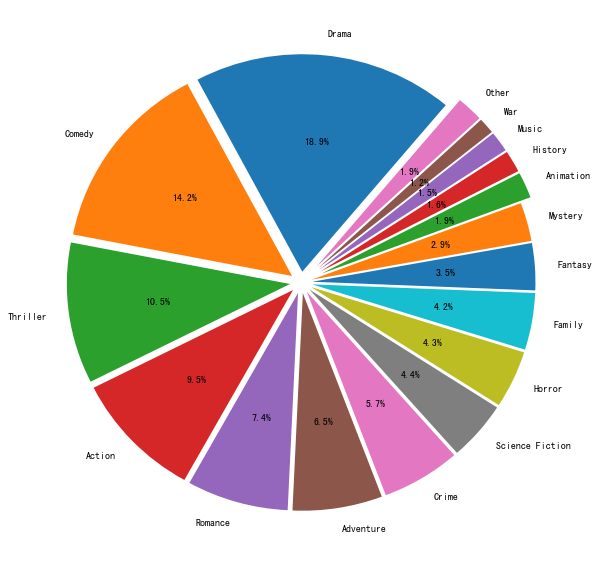

In [25]:
genres_catl = genres_df['name'].value_counts()
genres_catl = genres_catl / genres_catl.sum()
others = 0.01
genres_catl_ = genres_catl[genres_catl>=others]
genres_catl_['Other'] = genres_catl[genres_catl<others].sum()
explode = (genres_catl_ <= 0.02) / 20 + 0.05
genres_catl_.plot(kind='pie', label='', startangle=50, shadow=False, 
                 figsize=(10,10), autopct="%1.1f%%", explode=explode)
#主要的风格是戏剧，喜剧，惊悚，动作

## 出产地

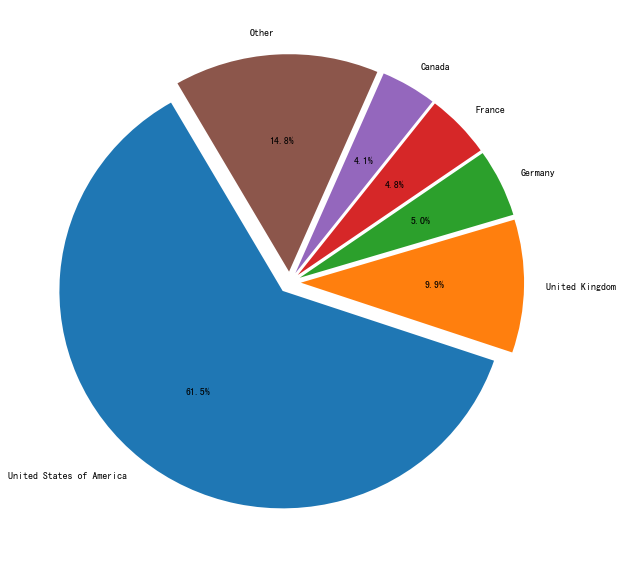

In [26]:
ct_catl = production_countries_df['name'].value_counts()
ct_catl = ct_catl / ct_catl.sum()
others = 0.04
ct_catl_ = ct_catl[ct_catl>=others]
ct_catl_['Other'] = ct_catl[ct_catl<others].sum()
explode = np.zeros(len(ct_catl_)) + 0.05
ct_catl_.plot(kind='pie', explode=explode, autopct="%1.1f%%", 
        figsize=(10,10), label='', startangle=120, shadow=False)
#美国居首位

## 语言

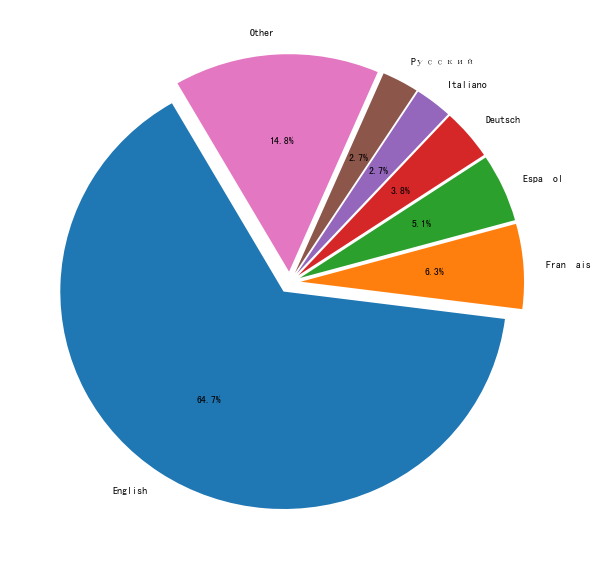

In [27]:
sp_catl = spoken_languages_df['name'].value_counts()
sp_catl = sp_catl / sp_catl.sum()
others = 0.02
sp_catl_ = sp_catl[sp_catl>=others]
sp_catl_['Other'] = sp_catl[sp_catl<others].sum()
explode = np.zeros(len(sp_catl_)) + 0.05
sp_catl_.plot(kind='pie', explode=explode, autopct="%1.1f%%", 
        figsize=(10, 10), label='', startangle=120, shadow=False)


## 年份

In [28]:
#仅取年的部分
full['release_year'] = full['release_date'].dt.year
full['release_month'] = full['release_date'].dt.month.fillna(0)
full['decade'] = full['release_year'].apply(lambda x:((x-1900)//10)*10)
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}
test = full['release_year'].groupby(full['decade']).apply(get_stats).unstack()

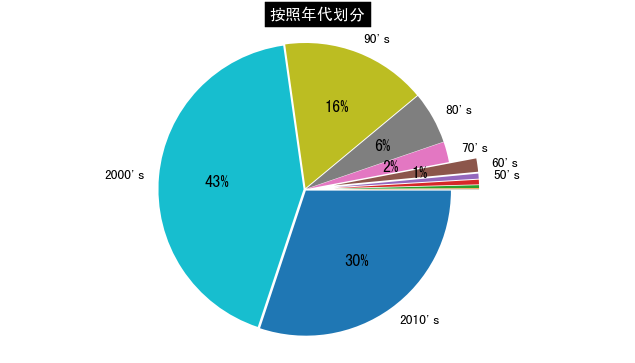

In [29]:
sns.set_context("poster", font_scale=0.85)
def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('按照年代划分',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);
full.drop('decade', axis=1, inplace = True)

## 演员

In [30]:
def create_comparison_database(name, value, x, no_films):
    
    comparison_df = cast_df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum()
    
    name_count_key = cast_df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

## 照片墙

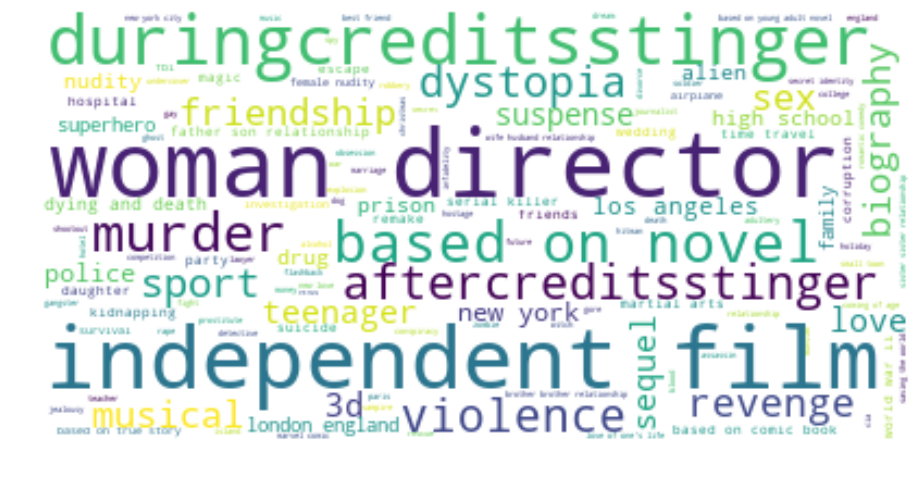

In [31]:

wc = WordCloud(background_color='white', max_words=2000, random_state=1). \
    generate_from_frequencies(keywords_df['name'].value_counts().to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
mask=b'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAADiJJREFUeNrs3Wtu47oShVHR8PynzP7TDQSBO/FDIovcaw3gIleWWJ/K6ZzWez8AgCw3lwAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAIAAAAAEAAAgAAEAAAAACAAAQAACAAAAABAAAUMDdJQA4V2utX/m/33tvrjIf36e9d1cBoNiQFwcIAAADXxQgAAAMfDGAAAAw8AUBAgDA0BcDCAAAQ18MIAAAgx8hsMv9/Oln4+8AAIY+T11DMbDXPW0DADgksRVY7J4+4zOwAQAMft66zkJg7XtaAAAOSYRA4D3tKwDAIckphMCYe/qs62wDABj82AgE3tM2AICDEhuBRe7pM6+pDQBg8HPZZyYC6t7TAgBwSHL55ycE6t3PvgIAHJYMkRwBZ9zLZ18/GwDA4Mc2IPBeLr0BsDoCwx/bAPfxNdfrvsqFFAFg+GMb4P4N2AA8upAiAAx+bAPS7t+rrs/NRQY817gH3vu5V75/S24AfrugNgHg4McmIOGevfKaLPmvAPxOABj+7HtPVDvfd71Xy20AZv1JRMCBim1ApXv06mvg7wAAhj8l75PREZB2b5baALxz8W0BwODHJmC3+3LEbFt+A+D3AcDwxybAvbjwBuDTD0UEgOGPTcAO99+oebZNAIgAMPwRAavfcyPn2Fa/BOjrADD82fue+n7Gu88W3wCs8B9NAAx/2OXt/zgW+1PADh/w/AECwCEEgLf/VQPgykEtAkB4g+EftgFwIIFnDQz/4ABwMIFnDCgWACMPDQcUeLbA23/YBgAw/MHwLxIAMw4OhxUAhG4ARAB4liD97T8yABxc4BmC9OF/HJP+FHClw8OfDQbDHxLnTfwvATrMAEh82fSvAEQAeFYgbPgLAAcbeEYgcPgLAAccAIHDf0oAVB+yIgA8F7Drc/z1WbYBcNiB5wE2fvv/Ovi//lx3H9P/L5h/IgjAioP/mXC3AfDmA54B2GT4f1/z//Tz2QDYBACw8PB/JtQf/XxD/xLgym8TIgBv/0Cl+fDsM/q/n88GwCYADH9YZPif+WwKgDcuvBAAYNQs+GTo//QzCgDbAACKDf8z3vR/+xkFgAiA0w8eMPzrP3cCQAQAMGHwXzn0n/lZBYAIAG//MGD4j3q+nv1ZBYAIAOCC4T8jqF/5WYcFwO5vFv6FAN7+IXfwr/j82ADYBgDwwvCvOuxfnT0CQASAt394MERXei7emTkC4OIDVQgAiOFqw/84/NcA3Uy4R92jsKxPXjIFgAMWgEACQAQAEPb2LwAmRIAQQJgCs4e/AHDoAhA4/AWACAAgcPgLgAIRIAQQocDo4S8AHMQABA5/AWAbAEDg8BcAtgG4z4BQAsDhDEDY278AKB4BQgDA8BcAtgEAGP4CwDYARCUY/gLAwQ2A4S8AbAMAMPwFgBAAwPCfEwAz/s+lhICrgPsFDH8bANsAAAx/AeDtDgDDXwDYBgAQP/wFgBAAIHD4C4CQEHAVAAz/7+4+jpwI8C8x3AeuAhj8UzYABtD8AWAIABj+wwMAIQBg+AsAhACA4S8AmBkCrgJAzvAXANgGAAQO/+M4jtb7+DPfoHEDc3juwLlpA4CNAIDhLwAQAgCGvwBACAAY/mfzlwB5OQRWv+mTPzfA4J+6ATA8bAQADP/AAEAIABj+c/kKgNNCYMcHBGDXs23K3wF4NDTwsOBZA2fZOL4C4NKhY/AA1OQrAIa+fdoKANgAGAa2AgDYAGArAEDEBgBsBQBCA8DbH99DQAwA2AAgBsSA0AYEAMkx4EoAbBYA3k6wFQAYy78CYNkYEJAAi28AHOLYDADYAMApmwFhCbDABsBhje0AgA0AXLodEJuAACim9968rTEyBgQBIABAEAgCQADYAiAIBAEgAEAQLBwFwhpYIgAcVogCABsAEAUAKQFgC8CuUSAMAAEgAhAG4gAQAMDPcfBJIAhqYKkAcGjBa4FwZjQAAgAIiwZgX7dVflBvLwAQGAAiAABCAwAACA0AWwAACN0AiAAACAwAACA0AGwBACB0AyACACAwAEQAAIQGgAgAwHwJDQARAAChAQAAhAaALQAAhG4ARAAABAaACACA0AAQAQBQIABaa7211kUAAARuAGaEgAgAgMkBMCsERAAAFAiAGSEgAgAwN4oEwPcQuDoGRAAAFAqAkVsBEQAAhf8Z4JVbAREAQLr7Cj/k1wg4a3j/+9+Z8c8TAcAGYPJmwDYAAAEQGgMiAIA0913+jzyKgFcGu68EABAAwVHQe28iAIDdtd7HzDpDFYBVJHw1fPMxA0AeAQAAAgAAEAAAgAAAAAQAAGwn5Y/DCQAAsAFQVAAgAAAAAQAACAAAQAD8zu8BAFBZ0pyyAQAAGwAAQAAAAAIAABAAb/GLgABUlDafbAAAwAYAABAAF/E1AADYAAAAAgAAxkrcTN9cbACwAQAABAAAIABO5msAAGZLnUU2AAAgAAAAATCArwEAwAYAALyEpgSALQAA2AAAACkBYAsAADYAAODFMyUAbAEAwAYAAEgJAFsAALABAAAvmykB4IMBABsAACAlAGwBADBfbAAAgJQAUGkAELoBEAEAEBgAAOClMjQAfGAAYAMAAKQEgC0AAOZI6AbAhwcAgQEgAgAgNAAAwMtjaAD4IAEgdAMgAgAgMABEAABmRWgAAAChAaDsACB0AyACADAfAgPAhwwAoQEgAgAgNABEAADmQWgA+NABIDQARAAAhAaACADI5fwPDwA3AQCEBoAIAPD2T2gAuCEAIDQARAAAhAaACABwxhMaAG4QADiO1nvPvgCtdbcBgJc7GwA3DAAIABEAAAJABADgDBcA+91AbiIABICSBMCZLQBsAwBAAChLAFhU/N8BeOli+ZsBAF7SbAAybzQ3GwACQHEC4CwWALYBALAGvwNw1oX0+wEA3v5tAGwEAMAGwEYAAG//pdxdgutvUDEAgA2ArQAA3v5tAGwFAEAAiAEAGMBXANU+EDEA8OuLEzYA29/gggCAK/g7ALYBAN7+bQDyBmuVm8qwB0AAFBi8Z4eBAQ/g7b/U/Ev9JUADGUAAJPM7AAAY/gIAABAAqhIA57QAAAAEgLoEwPksAAAAAQAA3v4FgBsNAGeyAAAABIDiBHAWO4sFAAAgAJQngDMYAQAACAAFCuDsRQAAYPgjANyMACAAAPDChQBwUwIgAADAi5YAcHO6CgAIAADwgiUA3KQAOFcFgJsVAAQAAHihEgBuWgDnKALAzQsAAgAAL1AIADcxAAgAEQDgzEQAuKEBnJUIADc2AAgAALwkIQDc4ADORgSAGx0ABIAIAHAeCgDc9ADOQQGAmx8AAYAIAHD2CQAAMPwFAB4GwHmHAODvQ+HBAEAAqGMA5xsCwEMC4FxDAHhYAEAAiAAAZxkCwIMD4AxDAHiAAJxdCAAPEgC8qPXeXYXZH0JrPgTASws2AB4sAGcUAsADBuBs4mS+Aqj4ofhKADD8sQHw0AGADYBtAIAXEWwAPIQAzh1sAGwDAAx/BIAQADD8ecRXAB5SAGwAsA0AvFggABACgOGPAEAIAIY/AgAxABj+CACEAGD4IwAQA4DhT1n+GWDgg+/hB8AGAJsB8PaPAAAxAIY/AgAEARj+CAAQBWD4IwBAHIDhjwAAcQCGP6u4uwQY/GD4k8ffAcDwB8MfAQCGPxj+JPAVAAY/GP7YAIDhD4Y/AgAMfzD82ZKvADD4wfDHBgAMfzD8sQEAgx8Mf2wAwPAHwx8bAAx+wPBHAGDwA4Y/q/AVAIY/GP7YAIDBD4Y/AgCDHzD82ZKvADD8wfDHBgCDHzD8EQAY/IDBjwDA4AcMfwQABj9g+CMAMPgBwx8BgMEPGP4IAAx+wPBHAGDwg8EPAgCDHwx/EAAY+mD4gwDA4AfDHwSAoQ8Y/CAADH7A8AcBYOgDhj8IAIMfMPxBABj6gMEPAsDABwx/BACGPmD4IwAw9AGDHwGAgQ8Y/ggAA9/AB4MfBIBhDxj+IAAMfMDwBwFg0AMGPwgAQx4w/KFgAPw2NCs9FAY8YPDDG/Oz926wAhj+CAAhABj8EB8AIgAw+CE0AIQAYPhDcAAIAcDghz3cPDyA4Q82ALYBgMEPAkAIAAY/CAARABj8IACEAGD4gwAQAoDBDwJACAAGP0QHgBAADH4IDgAhABj8EBwAQgAw+CE4AIQAYPBDcAAIAcDgh+AAEAKAwQ/BASAEwOAHggNACIDBDwQHgBAAgx8IDgAhAAY/EBwAYgAMfSA8AIQAGPxAcACIATD4gfAAEAJg6APBASAEwOAHggNADIChD4QHgBgAQx8IDwAxAAY/CADEABj6IAAQAxj6gABADGDgAwIAMYChDwgAMeAiYugDAkAQCAIMfUAAuMiCAMMeEABiwFXAwAcEgCDwAWDgAwJAEAgCDHxAACAMDHsAAYAoMOgBBADCwLAHEACIAwMeQAAgEgx4AAFAciQY6AACAADi3VwCABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAAIAAAAAEAAAgAAAAAQAACAAAQAAAAAIAABAAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAAABAAAIAABAAAAAAgAAEAAAgAAAAAQAACAAAEAAAAACAAAQAACAAAAABAAAsJQ/AwAcNm878OM58wAAAABJRU5ErkJggg=='

In [33]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import codecs
from scipy.misc import imread
from nltk.corpus import stopwords

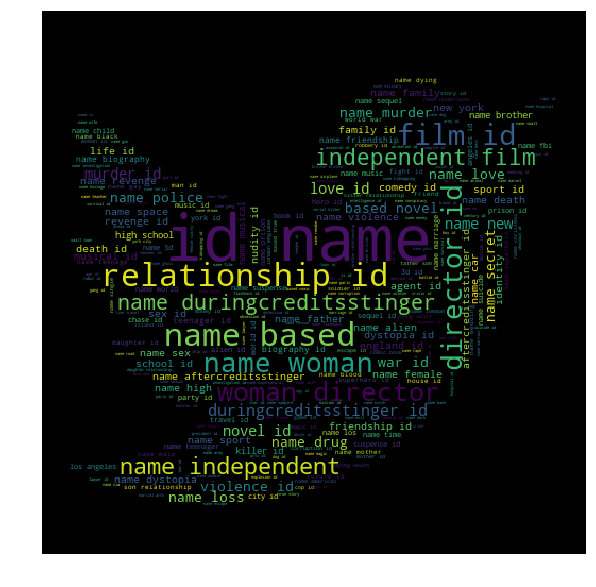

In [34]:
plt.subplots(figsize=(12,12))
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
f1=open("mask.png", "wb")
f1.write(codecs.decode(mask,'base64'))
f1.close()
img1 = imread("mask.png")
hcmask1 = img1
words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# 数据可视化

In [35]:
def merge_by_movie(left, right_cols):
    return pd.merge(left=left, right=full[right_cols + ['movie_id']], \
                    how='left', left_on='movie_id', right_on='movie_id')

years_genres_change = merge_by_movie(genres_df, ['release_year']).groupby(['release_year', 'name']).apply(len)
years_genres_idx = pd.MultiIndex.from_product([sorted(full.release_year.unique()),\
                                               genres_df.name.unique()], 
                                             names=['release_year', 'genre'])
years_genres_change_df = pd.DataFrame(index=years_genres_idx, columns=['amount'], data=0)
years_genres_change_df.loc[years_genres_change.index, 'amount'] = years_genres_change.values
years_genres_change_df.reset_index(level=['release_year'], inplace=True)
traces = []
for g in np.unique(years_genres_change_df.index):
    trc = pyg.Bar(x=years_genres_change_df.loc[g,'release_year'], \
                      y=years_genres_change_df.loc[g,'amount'], text=g, name=g)
    traces.append(trc)
layout_comp = pyg.Layout(title='Movies amount per genres distribution by year', hovermode='closest', barmode='stack', \
                   xaxis={'title': 'year', 'gridwidth': 1}, \
                   yaxis={'title': 'amount', 'gridwidth': 2})
fig_comp = pyg.Figure(data=pyg.Data(traces), layout=layout_comp)
pyo.iplot(fig_comp)